# Regressão logística


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


##### Introdução
Uma regressão linear múltipla buscar modelar a relação entre diversas variáveis explicativas (ou features) x com a variável resposta (ou target) y.

De forma matemática, o objetivo da regressão linear é determinar os coeficientes $\beta$ da equação:

$\small y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}$

No caso da regressão linear, a variável resposta (target) é contínua.

Dessa forma, ao tentar estimar o preço de um imóvel usando sua área em $m^2$, quantidade de quartos e quantidade de banheiros, a regressão linear pode ser uma boa opção.

Porém, como proceder nos casos em que o target não é contínuo, mas binário (ou seja, com apenas dois valores possíveis)?




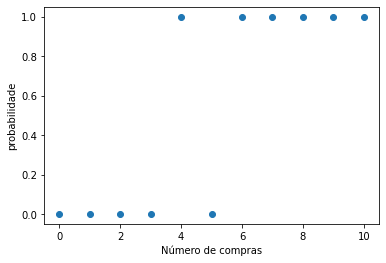

In [21]:
#Dados separados em duas classes
df = pd.read_csv('fraude.csv', sep=';')
X = df['num_compras']

fig, ax = plt.subplots()

ax.set_ylabel('probabilidade')

ax.set_xlabel('Número de compras')
plt.scatter(df.num_compras,df.fraude)

Um dos caminhos é a _regressão logística_! Esse é um dos métodos de machine learning que tem o papel de fazer $\textbf{classificação}$ (em especial, uma classificação binária). Nessa classificação, as classes têm valores 0 e 1. A função que classifica os dados dará uma probabilidade daquele conjunto de dados pertencer ou a classe 0 ou a classe 1. 


Assim, uma reta não é uma boa escolha para fazer essa tarefa. Além de não ser limitada entre 0 e 1, ela não ajusta bem dados que são linearmente separáveis:

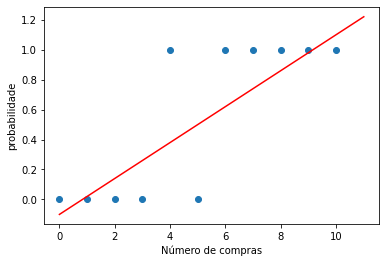

In [23]:
#Exemplo de reta de regressão linear "ajustada" aos dados
fig, ax = plt.subplots()

ax.set_ylabel('probabilidade')

ax.set_xlabel('Número de compras')
plt.scatter(df.num_compras,df.fraude)
x = np.linspace(0,11)
y = 0.12*x - 0.1 

plt.plot(x,y, color='red')

Outro tipo de função ajustada aos dados: $\textbf{sigmóide}$ 

A função mais utilizada - e que possui as características necessárias para fazer a classificação de dados binários - é a _sigmóide_, também conhecida como _função logística_.

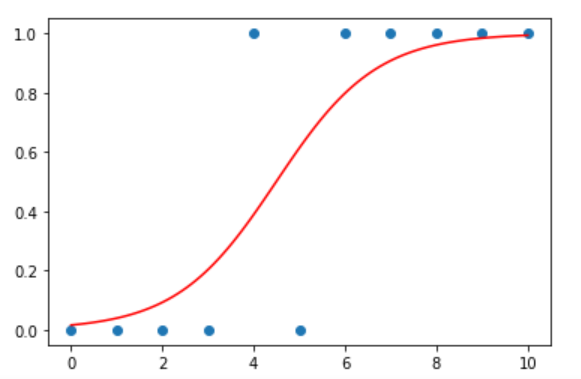

O objetivo é calcular 𝑝(𝑦=0|𝐱)  e  𝑝(𝑦=1|𝐱), isto é, a probabilidade de um certo conjunto de dados pertecer a uma das duas classes. Utilizando a função logística para esse papel, teremos:

$$
p(y=1|z) = \frac{e^{z}}{1+e^{z}} = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\beta_{0}+ \beta_{1} x_{i} + \beta_{2} x_{2} + ... +\beta_{n} x_{n})}} 
$$

onde:
$$ 
z =  \beta_{0}+ \beta_{1} x_{i} + \beta_{2} x_{2} + ... +\beta_{n} x_{n} = \beta^{T} \textbf{x}
$$

Chamando a probabilidade de p e isolando z, teremos:

$$
z = ln(\frac{p}{1-p}) = log(Odds) = \beta_{0}+ \beta_{1} x_{i} + \beta_{2} x_{2} + ... +\beta_{n} x_{n} 
$$

Note que a fração $Odds = \frac{p}{1-p}$ representa a "chance", que indica quantas vezes mais chance temos de obter 1 comparado com 0.

Para efetuar o ajuste dos parâmetros, podemos utilizar função fit(), da classe LogisticRegression() (present no sklearn.linear_model)

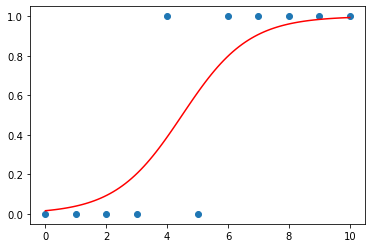

In [68]:
#Ajuste do modelo de regressão logística
X = np.array(df['num_compras']).reshape(-1,1) #somente uma feature
Y = np.array(df['fraude'])#.reshape(-1,1) #target

model = LogisticRegression() #instanciando a função
model.fit(X, Y) #fittando os dados
#--> os resultados dos parâmetros estão nas variáveis model.coef_ e model.intercept 

#utilizando valores para o gráfico da sigmóide resultante 
x = np.linspace(0,10,100).reshape(-1,1)
z = x*model.coef_ + model.intercept_

yo = 1/(1+np.exp(-z))
plt.plot(x,yo, color='red')
plt.scatter(df.num_compras,df.fraude)

In [69]:
#Verificando o resultado do modelo
y_pred = model.predict(X)

print('Classes previstas:',y_pred)
print('Classes corretas :',Y)

Classes previstas: [0 0 0 0 0 1 1 1 1 1 1]
Classes corretas : [0 0 0 0 1 0 1 1 1 1 1]


In [70]:
#Verficando a qualidade do modelo
confusion_matrix = metrics.confusion_matrix(Y,y_pred)
confusion_matrix

array([[4, 1],
       [1, 5]], dtype=int64)

In [71]:
#Acurácia, precisão e recall (aqui, para todo os dados -->a maneira mais adequada é comparar com os dados de teste)
print("Accuracy:",metrics.accuracy_score(Y, y_pred))
print("Precision:",metrics.precision_score(Y, y_pred))
print("Recall:",metrics.recall_score(Y, y_pred))

Accuracy: 0.8181818181818182
Precision: 0.8333333333333334
Recall: 0.8333333333333334


#### Exemplo do Titanic

In [85]:
#Lendo o dataset 'titanic.csv'
df_titanic  = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#Retirando algumas features (nesse exemplo, serão usadas apenas 3)
df_titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Embarked','Sex'], inplace=True)
df_titanic

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [87]:
#Preenchendo os valores faltantes com a média
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)
df_titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [88]:
#Preparando os dados: separando features e target
colunas = ['Pclass', 'Age', 'Fare']

X = df_titanic[colunas]
Y = df_titanic.Survived


In [64]:
#Dividindo os dados de treino e de teste por meio da função "train_test_split", do módulo sklearn.model_selection 
#(nesse caso, 80% para treino e 20% para teste )

In [89]:
#Dividindo os dados de treino e de teste por meio da função "train_test_split", do módulo sklearn.model_selection 
#(nesse caso, 80% para treino e 20% para teste)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


#instanciando a classe LogisticRegression
model = LogisticRegression()

#Treinando o modelo (fittando o modelo)
model.fit(X_train, y_train)

#Previsões
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [90]:
#Matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[98, 12],
       [36, 33]], dtype=int64)

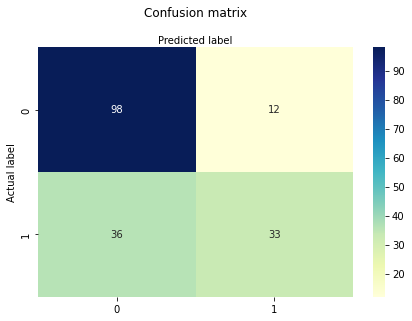

In [91]:
#Plottando a matriz de confusão
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7318435754189944
Precision: 0.7333333333333333
Recall: 0.4782608695652174
